### 라이브러리 호출

In [1]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt

#### 잘 불러와지나 확인

In [2]:
img_path1 = os.getenv('HOME')+'/aiffel/human_segmentation/images/army.jpeg'  
img_path2 = os.getenv('HOME')+'/aiffel/human_segmentation/images/middle.jpeg'
img_path3 = os.getenv('HOME')+'/aiffel/human_segmentation/images/dog.jpg'  
img_path4 = os.getenv('HOME')+'/aiffel/human_segmentation/images/eiffel.jpg'  

img_orig1 = cv2.imread(img_path1) 
img_orig2 = cv2.imread(img_path2) 
img_orig3 = cv2.imread(img_path3) 
img_back = cv2.imread(img_path4) 

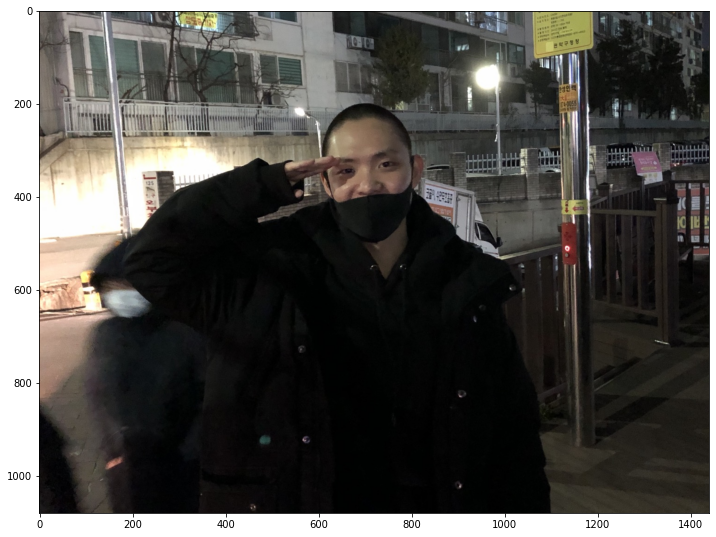

In [3]:
plt.figure(figsize=(12,12))
plt.imshow(cv2.cvtColor(img_orig1, cv2.COLOR_BGR2RGB))
plt.show()

### 여기는 노 수정

In [4]:
# 저장할 파일 이름을 결정합니다
# 1. os.getenv(x)함수는 환경 변수x의 값을 포함하는 문자열 변수를 반환합니다. model_dir 에 "/aiffel/human_segmentation/models" 저장
# 2. #os.path.join(a, b)는 경로를 병합하여 새 경로 생성 model_file 에 "/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5" 저장
# 1
model_dir = os.getenv('HOME')+'/aiffel/human_segmentation/models' 
# 2
model_file = os.path.join(model_dir, 'deeplabv3_xception_tf_dim_ordering_tf_kernels.h5') 

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5' 

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file) # urllib 패키지 내에 있는 request 모듈의 urlretrieve 함수를 이용해서 model_url에 있는 파일을 다운로드 해서 model_file 파일명으로 저장

('/aiffel/aiffel/human_segmentation/models/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x782a535ce5e0>)

In [5]:
model = semantic_segmentation() #PixelLib 라이브러리 에서 가져온 클래스를 가져와서 semantic segmentation을 수행하는 클래스 인스턴스를 만듬
model.load_pascalvoc_model(model_file) # pascal voc에 대해 

### 실험 시작

In [6]:
segvalues, output = model.segmentAsPascalvoc(img_path1) 

In [7]:
#pascalvoc 데이터의 라벨종류
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

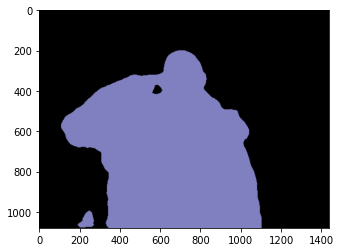

In [8]:
plt.imshow(output)
plt.show()

In [9]:
segvalues

{'class_ids': array([ 0, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [10]:
#컬러맵 만들기 
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20] #생성한 20개의 컬러맵 출력

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
print(colormap[15])

B, G, R = colormap[15][0], colormap[15][1], colormap[15][2]

print(B, G, R)

[192 128 128]
192 128 128


In [12]:
seg_color = (128,128,192)

(1080, 1440)


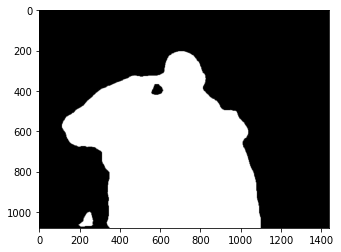

In [13]:
seg_map = np.all(output==seg_color, axis=-1) 
print(seg_map.shape) 
plt.imshow(seg_map, cmap='gray')
plt.show()

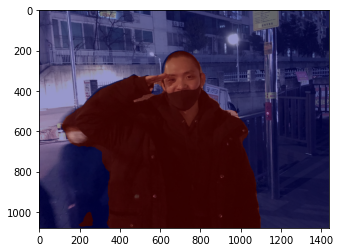

In [14]:
# 원본이미지를 img_show에 할당한뒤 이미지 사람이 있는 위치와 배경을 분리해서 표현한 color_mask 를 만든뒤 두 이미지를 합쳐서 출력
img_show = img_orig1.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

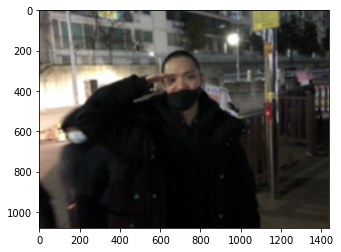

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig1, (13,13))

# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)   
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

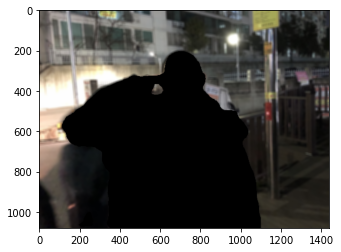

In [16]:
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경) 
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)

# cv2.bitwise_not(): 이미지가 반전됩니다. 배경이 0 사람이 255 였으나
# 연산을 하고 나면 배경은 255 사람은 0입니다.
img_bg_mask = cv2.bitwise_not(img_mask_color)

# cv2.bitwise_and()을 사용하면 배경만 있는 영상을 얻을 수 있습니다.
# 0과 어떤 수를 bitwise_and 연산을 해도 0이 되기 때문에 
# 사람이 0인 경우에는 사람이 있던 모든 픽셀이 0이 됩니다. 결국 사람이 사라지고 배경만 남아요!
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

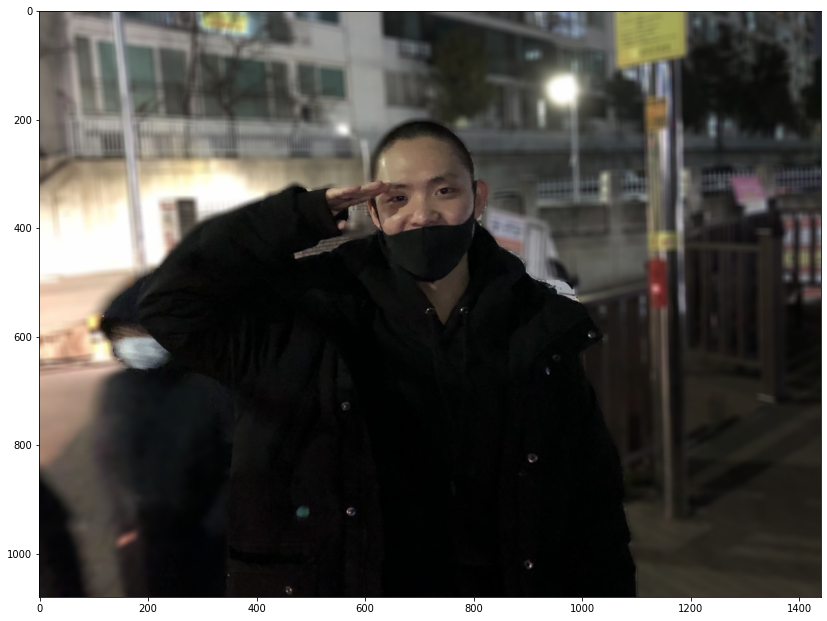

In [17]:
plt.figure(figsize = (14,14))
# np.where(조건, 참일때, 거짓일때)
# 세그멘테이션 마스크가 255인 부분만 원본 이미지 값을 가지고 오고 
# 아닌 영역은 블러된 이미지 값을 사용합니다.
img_concat = np.where(img_mask_color==255, img_orig1, img_bg_blur)
# plt.imshow(): 저장된 데이터를 이미지의 형식으로 표시한다.
# cv2.cvtColor(입력 이미지, 색상 변환 코드): 입력 이미지의 색상 채널을 변경
# cv2.COLOR_BGR2RGB: 원본이 BGR 순서로 픽셀을 읽다보니 
# 이미지 색상 채널을 변경해야함 (BGR 형식을 RGB 형식으로 변경)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 정리
왼쪽 경례하는 부분을 잘 보면 블러처리가 된 부분과 안된 부분을 확실하게 구분할 수 있다.

다른 부분에서는 뒤쪽 벽의 격자무늬를 볼 수 없는데 팔 아래 벽돌은 격자를 확인할 수 있는 것을 보아, 완전히 구분하지 못하는 것을 알 수 있다.

또한 옆에 사람이 지나갈때, 얼굴이 붙어서 나오는것을 알 수 있다. 하지만 그 아래 사람의 몸은 사람으로 인식하지 못하는 부정확성을 나타내는것을 확인할 수 있다.

## 크로마키 실험

(640, 960, 3)


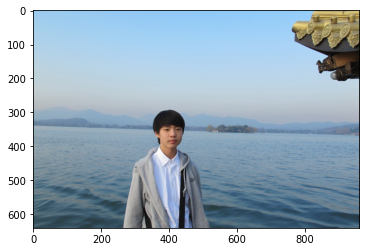

In [18]:
print(img_orig2.shape)
plt.imshow(cv2.cvtColor(img_orig2, cv2.COLOR_BGR2RGB))
plt.show()

segvalues, output = model.segmentAsPascalvoc(img_path2) # 원본은 호수에서 찍은 중학생때 사진

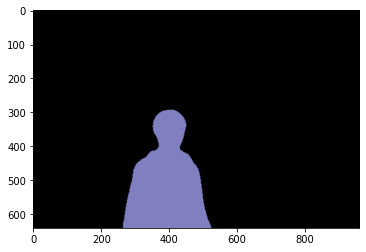

In [19]:
plt.imshow(output)
plt.show() # 추출

In [20]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
person


In [21]:
seg_color = (128,128,192)

(640, 960)


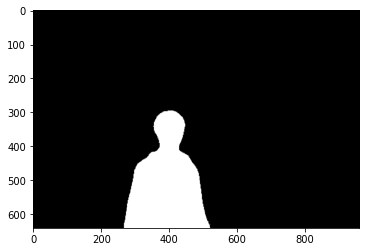

In [22]:
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape) # 이미지의 크기도 출력해서 크로마키할 사이즈 조정할때 사용
plt.imshow(seg_map, cmap='gray')
plt.show() 

(640, 960, 3)


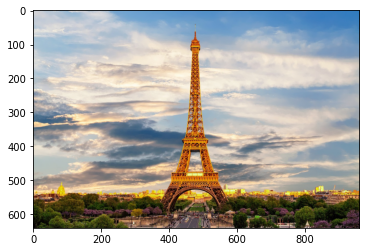

In [23]:
img_back = cv2.resize(img_back, dsize=(960,640)) # 크기 재조정

print(img_back.shape)
plt.imshow(cv2.cvtColor(img_back, cv2.COLOR_BGR2RGB))
plt.show()

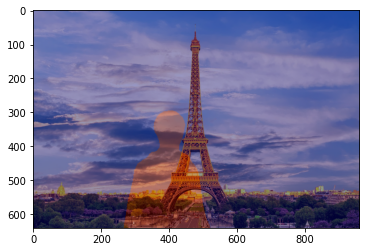

In [24]:
img_show = img_back.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0) # 마스크된 이미지와 크로마키 배경이미지 조합

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()


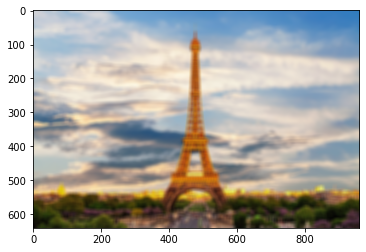

In [25]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_back, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

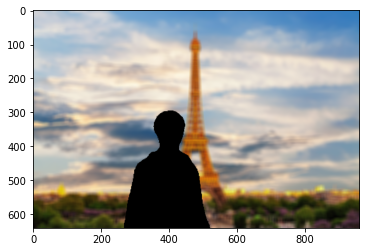

In [26]:
# 흐린 이미지에서 세크멘테이션 마스크를 이용해 배경만 추출하자.
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

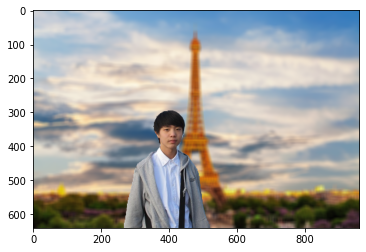

In [27]:
img_concat = np.where(img_mask_color==255, img_orig2, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

## 정리
크로마키 테스크를 작업할때는 두개의 이미지의 크기를 조정하는 것이 매우 중요하다.

## 파이썬스러운 함수화
### 라벨을 넣고, 원하는 객체를 인자로 받아, 그것만 추출하는 방식

In [37]:
# 라벨명 리스트
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

def blur_image_origin(img_path, img_orig, label_name):
    # 입력받은 객체 이름이 LABEL_NAMES에 있는지 확인
    if label_name not in LABEL_NAMES:
        # 라벨 이름이 없을 경우 모든 이미지를 블러처리
        print(f"'{label_name}' not found, applying blur to the entire image.")
        img_blur = cv2.blur(img_orig, (13,13))
        
        # 이미지를 출력
        plt.figure(figsize=(14, 14))
        plt.subplot(1, 1, 1)
        plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
        plt.title('Blurred Image')
        plt.show()
        return

    # 라벨 이름에 맞는 인덱스를 가져옴
    index = LABEL_NAMES.index(label_name)

    # 세그멘테이션 모델 적용
    segvalues, output = model.segmentAsPascalvoc(img_path)

    # 컬러맵 생성
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    B, G, R = colormap[index][0], colormap[index][1], colormap[index][2]
    seg_color = (R, G, B)

    # 세그멘테이션 맵 생성
    seg_map = np.all(output == seg_color, axis=-1)

    # 원본 이미지 복사
    img_show = img_orig.copy()

    # True/False를 255/0으로 변환
    img_mask = seg_map.astype(np.uint8) * 255

    # 컬러맵 생성
    color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

    # 원본 이미지와 컬러마스크 합성
    img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

    # 원본 이미지 블러 처리
    img_orig_blur = cv2.blur(img_orig, (20, 20))

    # 마스크 처리 및 배경 추출
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)
    img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)

    # 최종 합성
    img_concat = np.where(img_mask_color == 255, img_orig, img_bg_blur)

    # 3개의 이미지를 출력 (원본, 세그멘테이션, 합성)
    plt.figure(figsize=(18, 6))

    # 원본 이미지 출력
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # 세그멘테이션 결과 출력
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.title('Segmentation Image')

    # 최종 합성 이미지 출력
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title('Final Blended Image')

    plt.show()

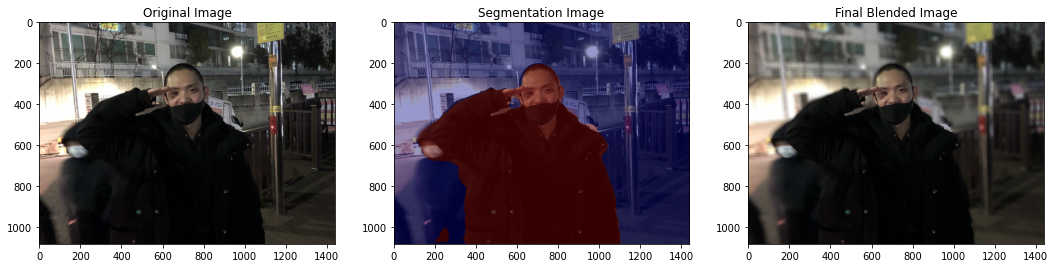

In [38]:
blur_image_origin(img_path1, img_orig1,'person')

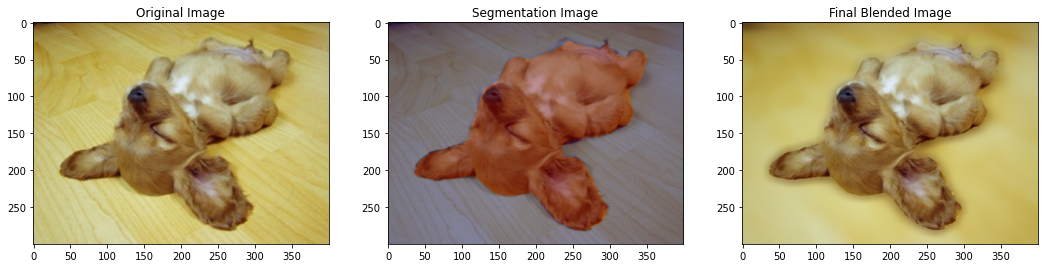

In [39]:
blur_image_origin(img_path3, img_orig3,'dog')

In [40]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 라벨명 리스트
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

def chroma_key_segmentation(background_img_path, orig_img_path, background_img, orig_img, label_name):
    # 입력받은 객체 이름이 LABEL_NAMES에 있는지 확인
    if label_name not in LABEL_NAMES:
        print(f"'{label_name}' not found, applying blur to the entire foreground image.")
        img_blur = cv2.blur(orig_img, (13,13))
        plt.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))
        plt.show()
        return

    # 라벨 이름에 맞는 인덱스를 가져옴
    index = LABEL_NAMES.index(label_name)

    # 세그멘테이션 모델 적용
    segvalues, output = model.segmentAsPascalvoc(orig_img_path)

    # 컬러맵 생성
    colormap = np.zeros((256, 3), dtype=int)
    ind = np.arange(256, dtype=int)

    for shift in reversed(range(8)):
        for channel in range(3):
            colormap[:, channel] |= ((ind >> channel) & 1) << shift
        ind >>= 3

    B, G, R = colormap[index][0], colormap[index][1], colormap[index][2]
    seg_color = (R, G, B)

    # 세그멘테이션 맵 생성
    seg_map = np.all(output == seg_color, axis=-1)

    # True/False를 255/0으로 변환
    img_mask = seg_map.astype(np.uint8) * 255

    # 원본 이미지 블러 처리
    img_orig_blur = cv2.blur(orig_img, (13, 13))

    # 마스크 처리 및 배경 추출
    img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
    img_bg_mask = cv2.bitwise_not(img_mask_color)

    # 배경 이미지 로드 및 크기 조정
    background_img = cv2.imread(background_img_path)

    # foreground와 background의 크기를 동일하게 조정
    height, width = orig_img.shape[:2]
    background_img_resized = cv2.resize(background_img, (width, height))

    # 크로마키로 배경과 합성
    img_bg_blur = cv2.bitwise_and(background_img_resized, img_bg_mask)

    # 최종 합성: 세그멘테이션된 foreground와 배경 이미지 합성
    img_concat = np.where(img_mask_color == 255, orig_img, img_bg_blur)

    # 결과 출력: 원본, 배경, 크로마키 합성된 이미지를 출력
    plt.figure(figsize=(18, 6))

    # 원본 이미지 출력
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
    plt.title('Original Image')

    # 배경 이미지 출력
    plt.subplot(1, 3, 2)
    plt.imshow(cv2.cvtColor(background_img_resized, cv2.COLOR_BGR2RGB))
    plt.title('Background Image')

    # 최종 합성 이미지 출력
    plt.subplot(1, 3, 3)
    plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
    plt.title('Chroma Key Result')

    plt.show()

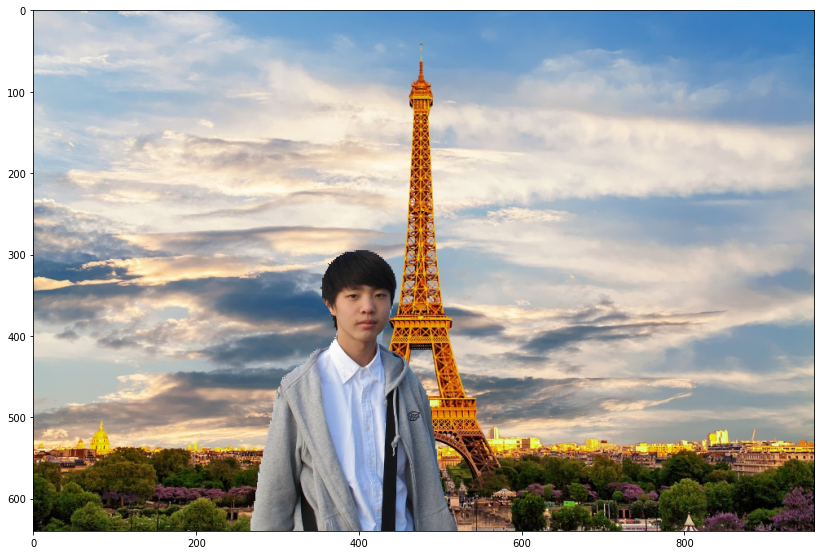

In [41]:
chromakey_segmentation(background_img_path=img_path4, orig_img_path=img_path2, background_img=img_back, orig_img=img_orig2, label_name='person')

## 회고
꽤 흥미롭게 진행한 거 같다.

단일 객체만 있거나, 아니면 틈이 없는 이미지의 경우에는 정확도가 1에 가까울 만큼 정확하게 세그멘테이션을 하는 것 같다.
   
하지만 여러 객체가 나오거나, 틈이 발생하는 경우에는 정확도가 조금씩 낮아지는 것을 확인할 수 있다.

또한 아직 이미지 공학에 대해 잘 아는건 아니라서 위에서 언급한 문제에 대해 해결책을 봐도 이해가 잘 안갔지만 그래도 이해하려고 노력해야겠다.

그루들과 이미지 비교해서 얻은 인사이트로는, 객체의 일부분만 나와도 인식을 하는 것을 봐서는 모델 학습시, 객체의 일부분도 라벨링되어서 학습된 것같다는 추측아닌 추측!



## 문제점 및 솔루션
- **인물사진의 문제점**
    - 흐린이미지는 분할 성능이 많이 떨어진다
    - 구멍(빈틈)이 뚫린 객체 인식 성능이 떨어진다
    - 주변 인물들도 같이 인식된다
    - 오브젝트가 들고 있거나 쓰고 있는 물체는 다른 객체로 인식된다
- **솔루션**
    - 모델 학습 시 다른 메트릭 사용
        
        해당 모델에서는 IoU를 사용했다.
        
        예측된 영역과 실제 영역의 다른 부분을 강조하는 지표를 사용한다면 더 나아질 수도 있다.
        
    - 다른 모델 사용 : FCN, SegNet, U-Net
    - **기존 오류 줄이는 방법**
        - 사진만으로 깊이를 알수있는방법 → 깊이 탐지 딥러닝 기술
        - 카메라에 달린다른 기능을 이용하는 방법 → 적외선 input을 통해 깊이를 탐색하는 방법
    - **시멘틱 말고 가장 가까운 인물만을 포커스 해주는 인스턴스 분할 사용**
        - 깊이 탐지 기능을 이용해서 가장가까운 객체에만 아웃포커싱 진행
    - **해상도가 낮아서 생기는 문제를 생각해보자**
        - 해상도를 올려주는 기능을 사용하기
        - 추론시 해상도 높은 이미지로 넣자
    - **파인튜닝을 이용해서 분류기 부분의 범주를 줄이기**
        - 사람만 분할하게 하던지 등 (ZEP 같이 사람만 보이는 상황)